# Проект: Прогнозирование сердечно-сосудистых заболеваний

## Введение

Сердечно-сосудистые заболевания (ССЗ) остаются одной из **главных причин смертности во всём мире**. Ранняя диагностика и прогнозирование риска помогают **своевременно предпринимать меры** для профилактики, снижая число осложнений и смертельных случаев.  

В этом проекте используется **набор данных пациентов с признаками здоровья**, такими как возраст, пол, давление, уровень холестерина, индекс массы тела и другие показатели. Данные включают информацию о том, есть ли у пациента сердечно-сосудистое заболевание.

---

## Цель проекта

Цель проекта — **разработать модель машинного обучения**, которая сможет:

1. **Предсказывать наличие сердечно-сосудистого заболевания** у пациента на основе медицинских признаков.  
2. **Сравнивать эффективность различных моделей классификации**, включая логистическую регрессию, дерево решений, случайный лес и градиентный бустинг.  
3. **Анализировать значимость признаков** и выявлять факторы, наиболее влияющие на риск ССЗ.  
4. **Визуализировать данные и результаты**, чтобы сделать выводы понятными для специалистов и неспециалистов.

---

## Задачи

- Провести **исследовательский анализ данных (EDA)**: распределение признаков, пропущенные значения, корреляции.  
- Подготовить данные: нормализация, кодирование категориальных признаков.  
- Обучить и оценить несколько моделей классификации.  
- Сравнить модели по метрикам качества (accuracy, precision, recall, ROC-AUC).  
- Сделать визуализацию результатов: важность признаков, матрицы ошибок, графики распределения риска.


#### Загрузка данных и импорт необходимых библиотек

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import fbeta_score, classification_report, roc_auc_score

import joblib
import warnings
warnings.filterwarnings('ignore')
import time

In [39]:
data_raw = pd.read_csv(r'E:/projects/Проекты по DS/data/heart.csv')

#### Описание данных 
Подробнее расмотрим полученные данные и определим их типы 

In [40]:
print(data_raw.head(5))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [41]:
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [42]:
data_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### age
Возраст пациента в годах.

### sex
Пол пациента:  
- 1 — мужчина  
- 0 — женщина

### cp (chest pain type)
Тип боли в груди:  
- 0 — типичная стенокардия  
- 1 — атипичная стенокардия  
- 2 — неишемическая боль  
- 3 — бессимптомное течение

### trestbps
Артериальное давление в состоянии покоя (мм рт. ст.).

### chol
Уровень общего холестерина (mg/dl).

### fbs
Глюкоза натощак > 120 mg/dl:  
- 1 — да  
- 0 — нет

### restecg
Результаты ЭКГ в покое:  
- 0 — нормальная ЭКГ  
- 1 — изменения ST-T  
- 2 — признаки гипертрофии левого желудочка

### thalach
Максимальная частота сердечных сокращений при нагрузке.

### exang
Стенокардия, вызванная физической нагрузкой:  
- 1 — да  
- 0 — нет

### oldpeak
Депрессия сегмента ST при нагрузке относительно покоя.

### slope
Наклон сегмента ST при пиковой нагрузке:  
- 0 — нисходящий  
- 1 — ровный  
- 2 — восходящий

### ca
Количество крупных сосудов (0–3), окрашенных флюороскопией.

### thal
Состояние таллия (тип дефекта перфузии):  
- 0 — нормальный  
- 1 — фиксированный дефект  
- 2 — обратимый дефект

### target
Наличие сердечного заболевания:  
- 1 — заболевание присутствует  
- 0 — заболевания нет


#### Пропуски в данных  

Рассмотрим есть в данных пропущенные значения

In [43]:
print(data_raw.isna().sum() / len(data_raw))

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64


Пропусков в данных нет

### Первичный анализ данных (EDA)

Посомтрим на распределение таргета чтобы выявить возможный дисбаланс классов

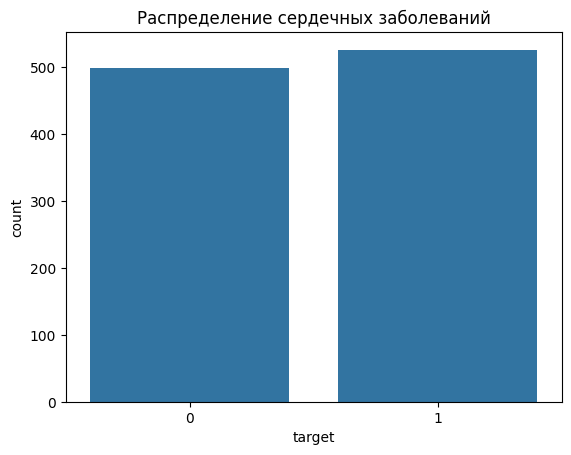

In [44]:
sns.countplot(x='target', data=data_raw)
plt.title('Распределение сердечных заболеваний')
plt.show()

По графику видно, что классы сбалансированны и колличество значений вних отличается незначительно

#### Выбросы и аномалии в данных

In [45]:
def num_ditribution(data, xcols, titles, xlables, figsize, minus):
    fig, axs = plt.subplots(len(xcols), 2, figsize=figsize)
    for i in range(len(xcols)):
        sns.histplot(data=data, x=xcols[i], bins=30, ax=axs[i, 0])
        axs[i, 0].set_xlabel(xlables[i])
        axs[i, 0].set_ylabel('Количество')
        axs[i, 0].set_title(titles[i])

        sns.boxplot(x=data[xcols[i]], orient='h', ax=axs[i, 1])
        axs[i, 1].set_xlabel(xlables[i])
        axs[i, 1].set_title(titles[i])

    plt.subplots_adjust(wspace=0.3, hspace=0.9)
    plt.show()

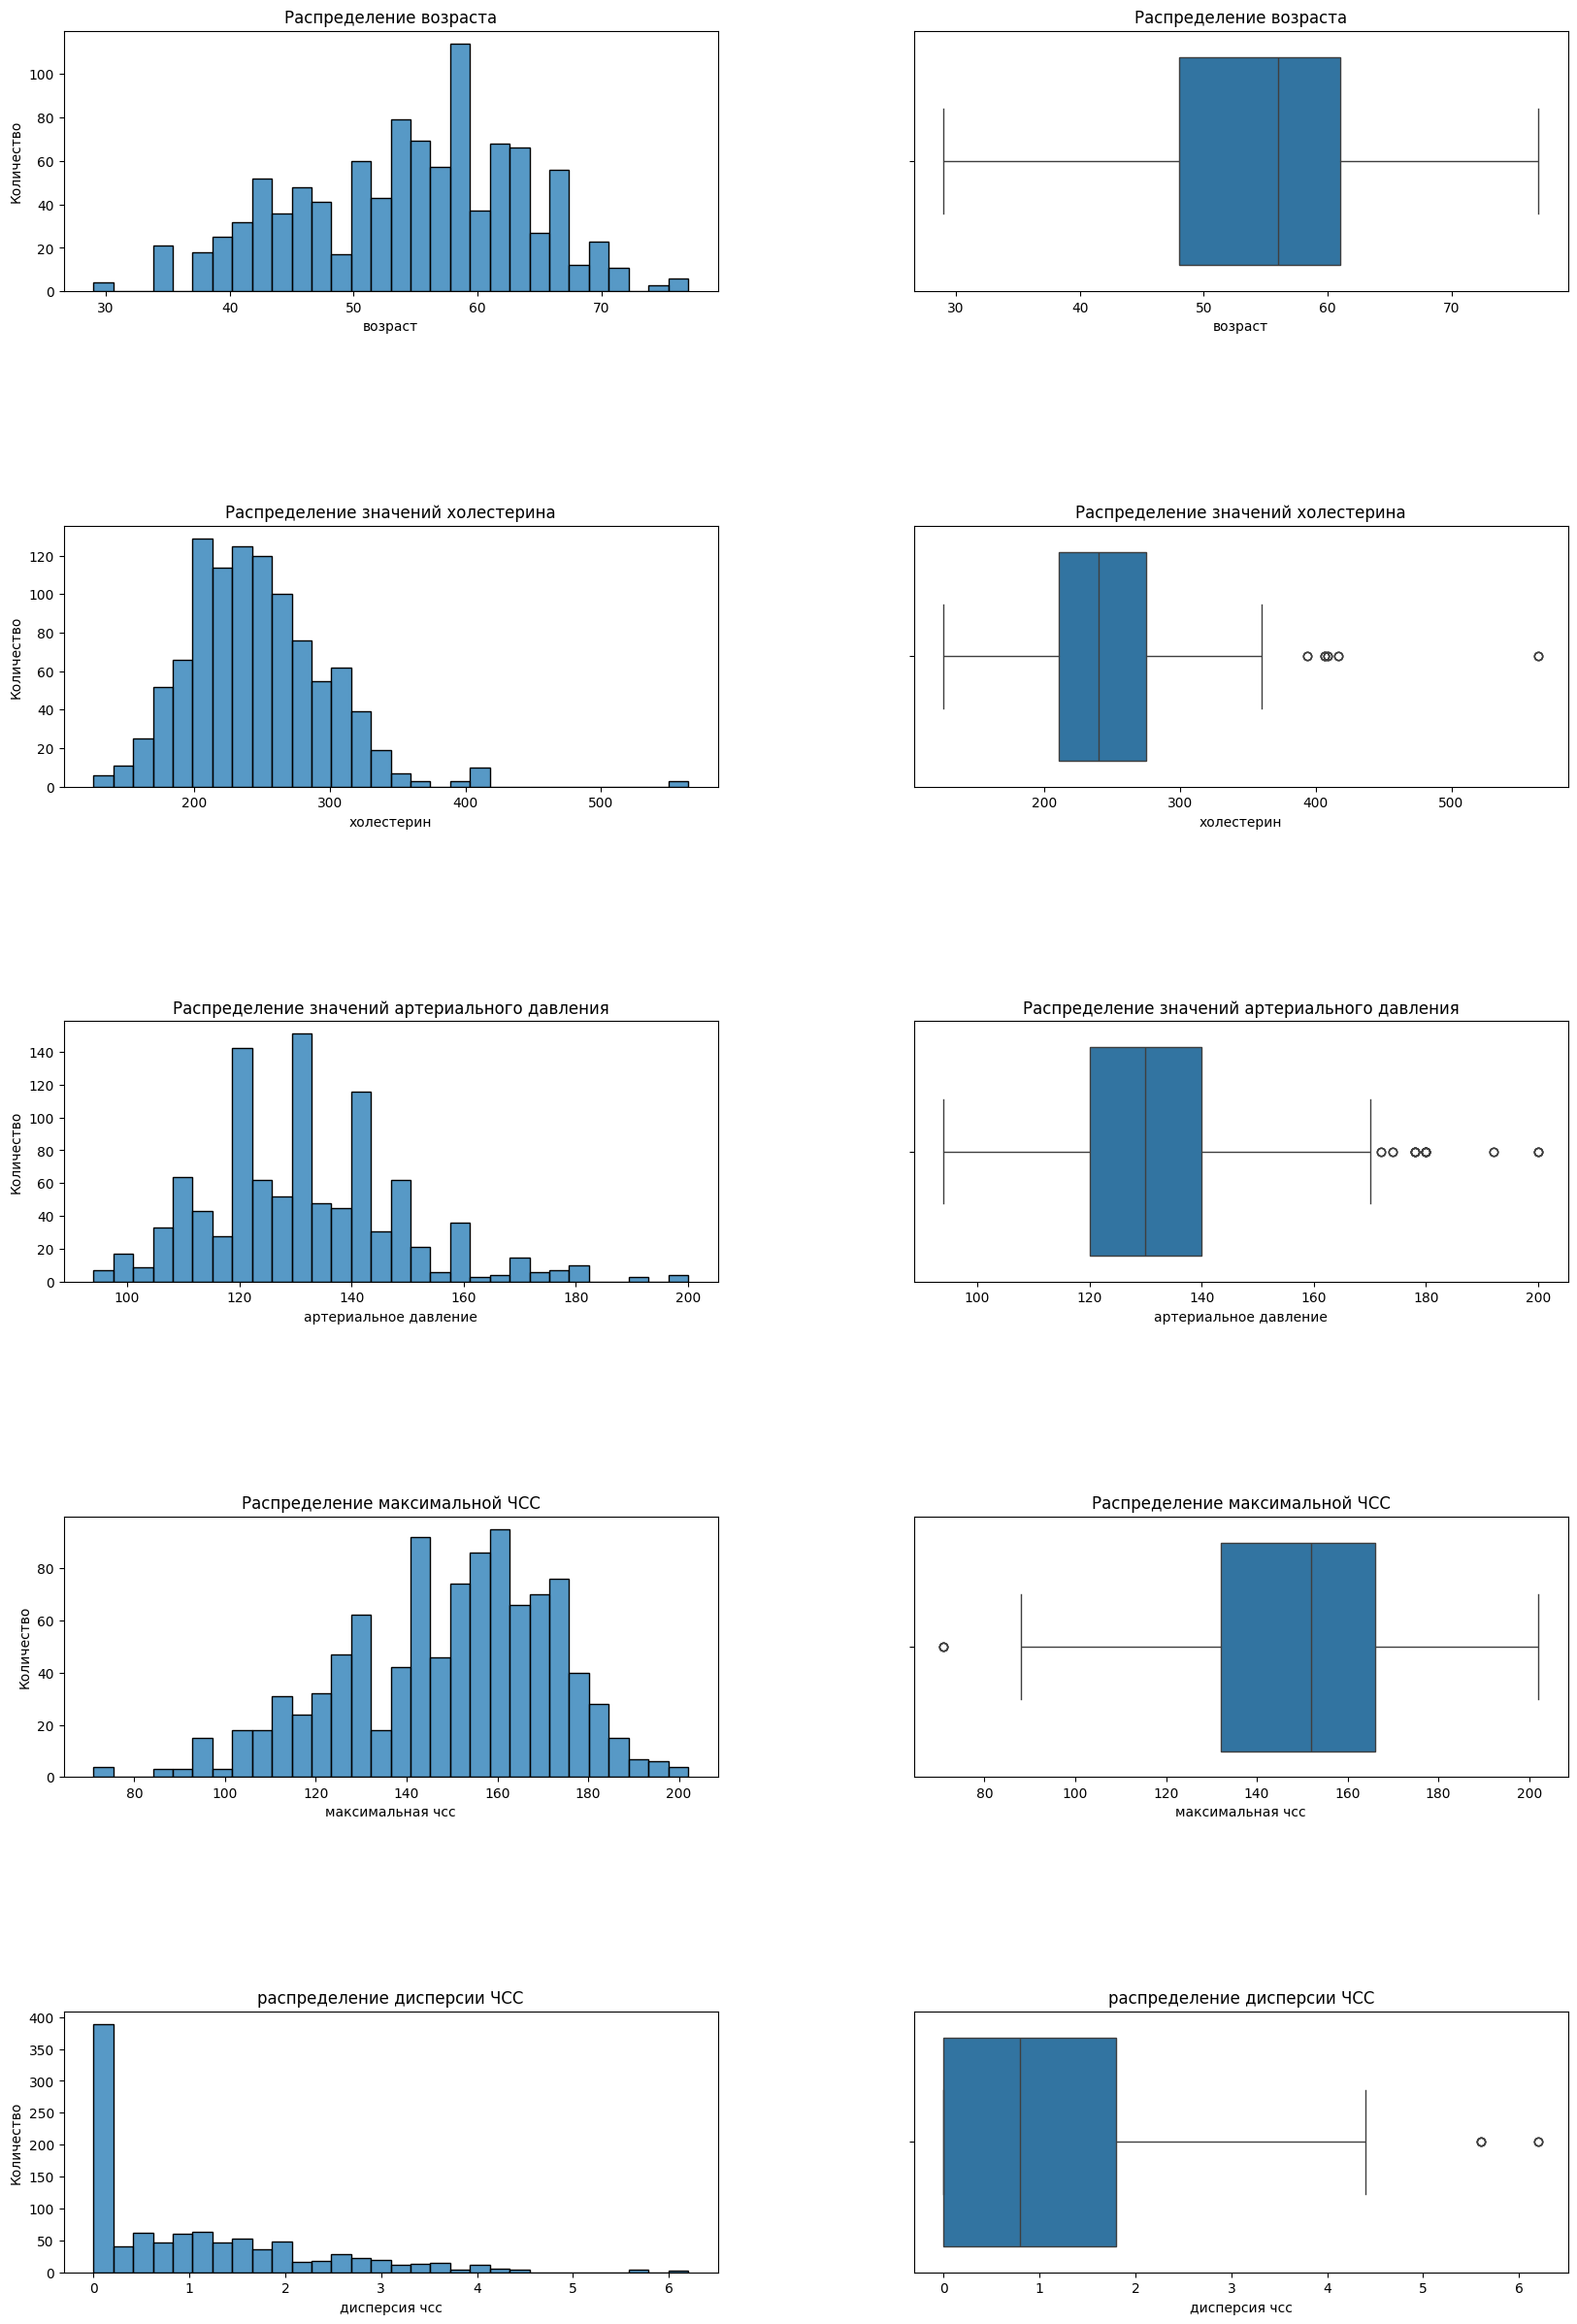

In [46]:
xcols = ['age', 'chol','trestbps','thalach','oldpeak']
titles = ['Распределение возраста', 
          'Распределение значений холестерина', 
          'Распределение значений артериального давления', 
          'Распределение максимальной ЧСС', 
          'распределение дисперсии ЧСС', 
          ]
xlables = [
    'возраст',
    'холестерин',
    'артериальное давление',
    'максимальная чсс',
    'дисперсия чсс'
]

num_ditribution(data_raw, xcols, titles, xlables, (20, 30), 1)

Из графиков можно сделать следующие выводы:
- В данных почти не обнаруженно выбросов
- В столбце **trestbps** есть несколько аномальных значений, артериальное давление больше 200
- В столбце **chol** также есть несколько значений, которые можно назвать аномалиями, значения холестерина в крови > 400

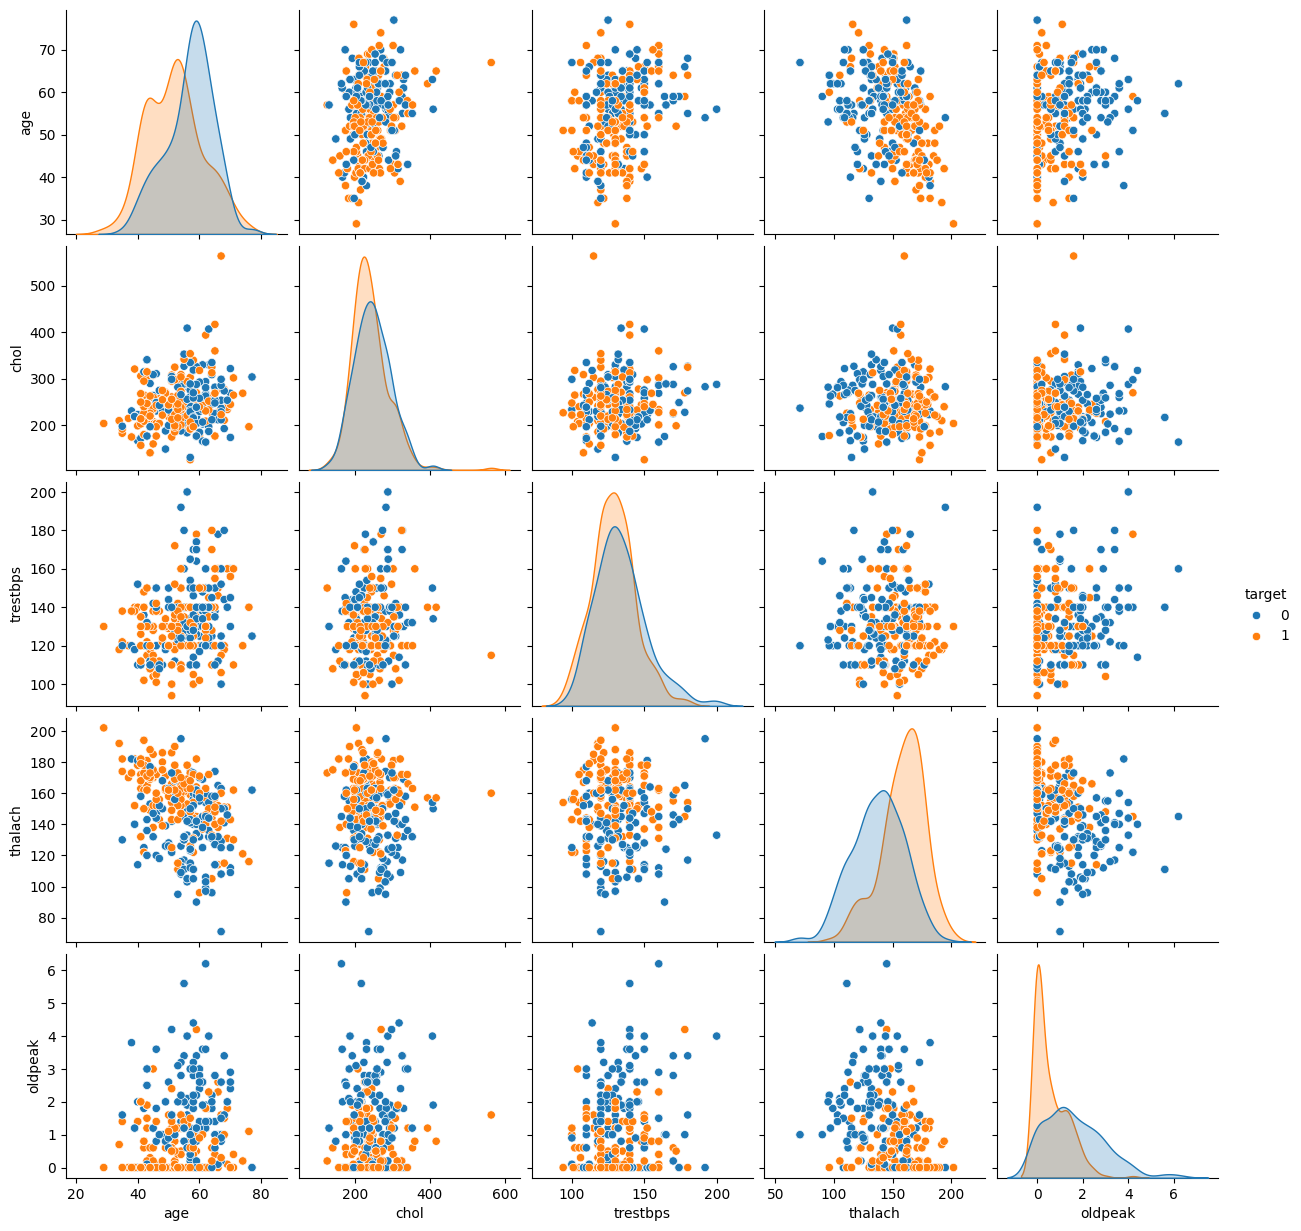

In [47]:
sns.pairplot(data_raw.sample(500), vars=['age', 'chol','trestbps','thalach','oldpeak'], hue='target')
plt.show()

In [48]:
data_raw = data_raw[(data_raw['trestbps'] < 200) & (data_raw['chol'] < 400)]


#### Корреляционный анализ

Построим матрицу корреляций и посомтрим на связи между признаками

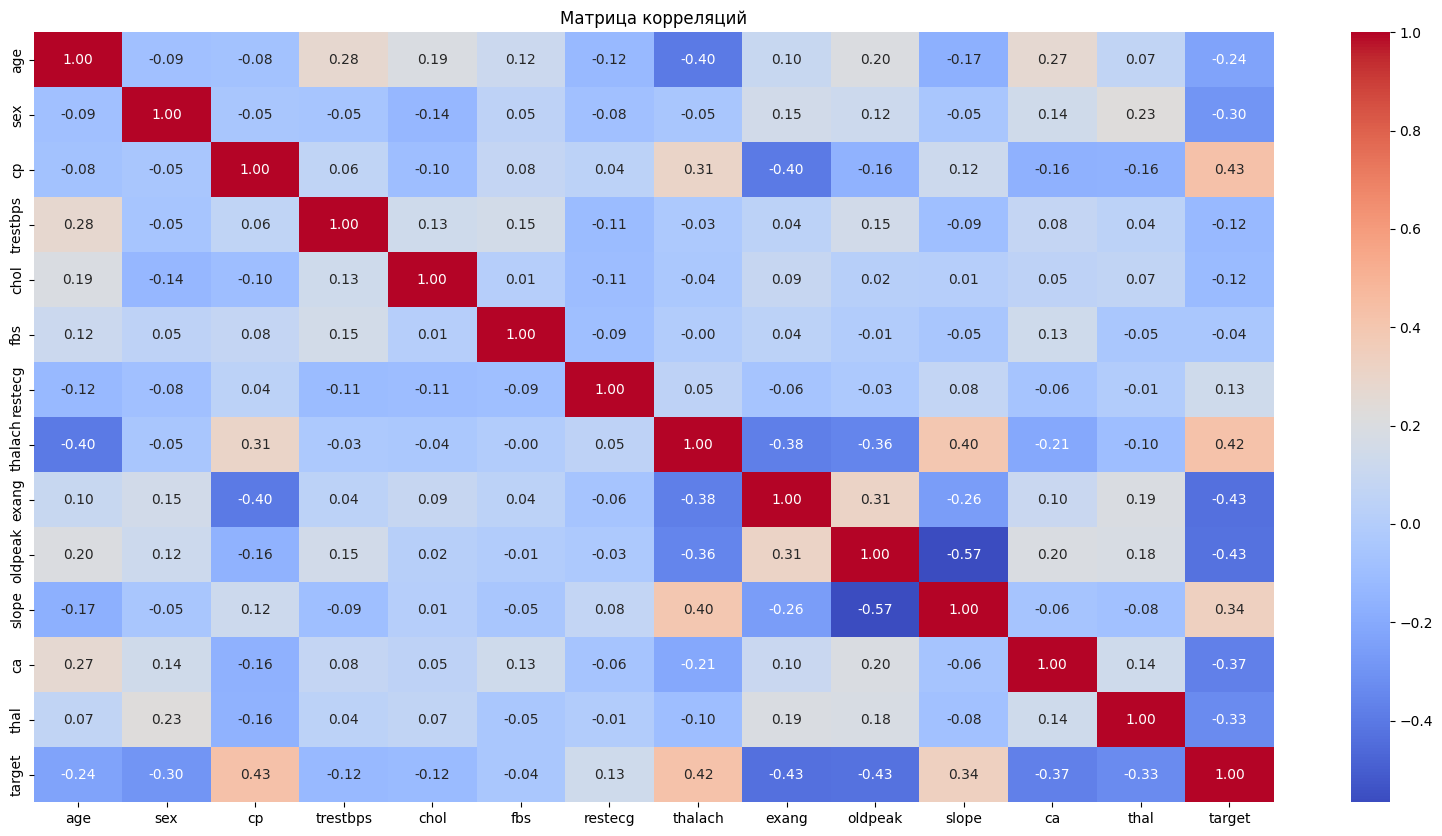

In [49]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_raw.corr(), fmt='.2f', cmap='coolwarm', annot=True)
plt.title('Матрица корреляций')
plt.show()

На графике видно:
- Столбец **fbs** почти не коррелирует с таргетом (r=-0.04), удалим его из датасета
- Топ три признака по влиянию на таргет **сp**, **thalach**, **slope**
- При анализе графика не были выявлены коллинеарные признаки

In [50]:
data_raw.drop('fbs', axis=1, inplace=True)
data_ready = data_raw.drop_duplicates().reset_index(drop=True)

В ходе исследовательского анализа(EDA) было сделано:
- Описание признаков
- Анализ на наличие дубликатов и пропусков
- Поиск и исправление выбросов и аномалий
- Корреляционный анализ

После всех преобразований итоговые данные сохранены в переменной **data_ready**

### Обучение и выбор моделей  

Разделим данные на обучающую и тестовую выборки

In [51]:
X = data_ready.drop('target', axis=1)
y = data_ready['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Создадим пайплайны и препроцессор для обработки категоральных данных

In [52]:
num_cols = ['age', 'chol','trestbps','thalach','oldpeak']
cat_cols = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']

ohe_pipe = Pipeline([
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ohe', OneHotEncoder(drop='first', sparse_output=True, handle_unknown='ignore'))
])

num_pipe = Pipeline([
    ('SimpleImputer', SimpleImputer(missing_values=np.nan, strategy='median')),
    ('stdscaler', StandardScaler())
])

In [53]:
data_preprosessor = ColumnTransformer([
    ('cat', ohe_pipe, cat_cols),
    ('num', num_pipe, num_cols)
], remainder='passthrough')

Так как у нас есть несколько признаков, которые линейно связаны с таргетом, то первой моделью будет LogisticRegression

In [54]:
lr_pipe = Pipeline([
    ('preprosessor', data_preprosessor),
    ('log_reg', LogisticRegression(random_state=42))
])


In [55]:
lr_roc_auc = cross_val_score(lr_pipe, X_train, y_train, cv=5, scoring='roc_auc').mean()

start_l = time.time()
lr_pipe.fit(X_train, y_train)
end_l = time.time()

start_p = time.time()
lr_pipe.predict(X_test)
end_p = time.time()

log_reg_stats = {
    'Время обучения': round(end_l - start_l, 3),
    'Время предсказания': round(end_p - start_p, 3),
    'ROC-AUC': round(lr_roc_auc, 3)
}

for key, value in log_reg_stats.items():
    print(f'{key}: {value}')

Время обучения: 0.022
Время предсказания: 0.007
ROC-AUC: 0.891


Создадим функцию для добавления результатов модели в словарь

In [56]:
def find_preprosessing_score(model):
    results_df = pd.DataFrame(model.cv_results_)
    best_scores_df = results_df[results_df['rank_test_score'] == 1]

    model_stats = {
        'Время обучения': round(best_scores_df['mean_fit_time'].iloc[0], 3),
        'Время предсказания': round(best_scores_df['mean_score_time'].iloc[0], 3),
        'ROC-AUC': round(model.best_score_,3)
    }

    for key, value in model_stats.items():
        print(f'{key}: {value}')
    return model_stats

Теперь рассмотрим модель DecisionTreeClassifier

In [57]:
dtree_pipe = Pipeline([
    ('preprosessor', data_preprosessor),
    ('dtree', DecisionTreeClassifier(random_state=42))
])

In [58]:
dtree_params_grid = {
    'dtree__max_depth': [2, 3, 5, 10, None],
    'dtree__min_samples_split': [2, 5, 10, 20],
    'dtree__min_samples_leaf': [1, 2, 5, 10]
}

In [59]:
dtree_search = GridSearchCV(
    estimator= dtree_pipe,
    param_grid=dtree_params_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

dtree_search.fit(X_train, y_train)
dtree_stats = find_preprosessing_score(dtree_search)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Время обучения: 0.023
Время предсказания: 0.011
ROC-AUC: 0.83


Далее рассмотрим RandomForestClassifier

In [60]:
rf_pipe = Pipeline([
    ('preprosessor', data_preprosessor),
    ('rf', RandomForestClassifier(random_state=42))
])

In [61]:
rf_params_grid = {
    'rf__n_estimators': [100, 300, 500],
    'rf__max_depth': [5, 10, 15, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 5]
}

In [62]:
rf_search = GridSearchCV(
    estimator=rf_pipe,
    param_grid=rf_params_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train)
rf_stats = find_preprosessing_score(rf_search)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Время обучения: 1.057
Время предсказания: 0.049
ROC-AUC: 0.891


Перейдём к моделям нрадиентного бустунга, рассмотрим LightGBM, XGBoost

In [63]:
lgbm_pipe = Pipeline([
    ('preprosessor',data_preprosessor),
    ('lgbm', LGBMClassifier(random_state=42))
])

xgboost_pipe = Pipeline([
    ('preprosessor',data_preprosessor),
    ('xgboost', XGBClassifier(random_state=42))
])

In [64]:
lgbm_params_grid = {
    'lgbm__n_estimators': [300, 500, 700, 800, 900, 1000],
    'lgbm__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

xgboost_params_grid = {
    'xgboost__n_estimators': [300, 500, 700, 800, 900, 1000],
    'xgboost__learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}


In [65]:
lgbm_search = GridSearchCV(
    estimator=lgbm_pipe,
    param_grid=lgbm_params_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

lgbm_search.fit(X_train, y_train)
lgbm_stats = find_preprosessing_score(lgbm_search)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 129, number of negative: 108
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 234
[LightGBM] [Info] Number of data points in the train set: 237, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.544304 -> initscore=0.177681
[LightGBM] [Info] Start training from score 0.177681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

In [66]:
xgboost_search = GridSearchCV(
    estimator=xgboost_pipe,
    param_grid=xgboost_params_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

xgboost_search.fit(X_train, y_train)
xgboost_stats = find_preprosessing_score(xgboost_search)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Время обучения: 0.117
Время предсказания: 0.014
ROC-AUC: 0.868


Создадим таблицу с итоговыми результатами моделей

In [67]:
models = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LGBMClassifier', 'XGBClassifier']
stats = [log_reg_stats, dtree_stats, rf_stats, lgbm_stats, xgboost_stats]

print(pd.DataFrame(stats, index=models))

                        Время обучения  Время предсказания  ROC-AUC
LogisticRegression               0.022               0.007    0.891
DecisionTreeClassifier           0.023               0.011    0.830
RandomForestClassifier           1.057               0.049    0.891
LGBMClassifier                   3.622               0.012    0.844
XGBClassifier                    0.117               0.014    0.868


Лучшей моделью оказалась **LogisticRegression**, за счёт максимальной точности, что является ключевым в поставленной задаче  
проверим итоговую модель на тестовых данны

In [71]:
best_model = rf_search.best_estimator_

y_pred = lr_pipe.predict(X_test)
print(f'F2-Score: {round(fbeta_score(y_test, y_pred, beta=2),3)}\nROC-AUC: {round(roc_auc_score(y_test, y_pred), 3)}')
print(classification_report(y_test, y_pred))

F2-Score: 0.904
ROC-AUC: 0.88
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.88      0.91      0.90        33

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



сохраним лучшую модель

In [ ]:
joblib.dump(best_model, 'heart_desease_log_reg')

# Портфолио Data Science проектов

## Список

|                                                            Название                                                           |                                                                                                                                                                                                                                                                                                                                                       Инструменты                                                                                                                                                                                                                                                                                                                                                      |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
| :---------------------------------------------------------------------------------------------------------------------------: | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|     [Предсказание цены на автомобиль](https://github.com/curiuwu/Machine-Learning-projects/tree/main/car_price_prediction)    |                                                          [<img src="https://img.shields.io/badge/Pandas-black?style=flat-square&logo=pandas&logoColor=orange"/>](https://pandas.pydata.org/) [<img src="https://img.shields.io/badge/Numpy-black?style=flat-square&logo=numpy&logoColor=orange"/>](https://numpy.org/) [<img src="https://img.shields.io/badge/Sklearn-black?logo=scikitlearn&logoColor=orange"/>](https://scikit-learn.org/) [<img src="https://img.shields.io/badge/CatBoost-black?logoColor=orange"/>](https://catboost.ai/) [<img src="https://img.shields.io/badge/LightGBM-black?logoColor=orange"/>](https://lightgbm.readthedocs.io/)                                                          |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
|               [Кредитный скоринг](https://github.com/curiuwu/Machine-Learning-projects/tree/main/credit_scoring)              |                                                                                                           [<img src="https://img.shields.io/badge/Pandas-black?style=flat-square&logo=pandas&logoColor=orange"/>](https://pandas.pydata.org/) [<img src="https://img.shields.io/badge/Numpy-black?style=flat-square&logo=numpy&logoColor=orange"/>](https://numpy.org/) [<img src="https://img.shields.io/badge/Sklearn-black?logo=scikitlearn&logoColor=orange"/>](https://scikit-learn.org/) [<img src="https://img.shields.io/badge/LightGBM-black?logoColor=orange"/>](https://lightgbm.readthedocs.io/)                                                                                                           |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| [Предсказание сердечных заболеваний](https://github.com/curiuwu/Machine-Learning-projects/tree/main/heart_disease_prediction) | [<img src="https://img.shields.io/badge/Pandas-black?style=flat-square&logo=pandas&logoColor=orange"/>](https://pandas.pydata.org/) [<img src="https://img.shields.io/badge/Numpy-black?style=flat-square&logo=numpy&logoColor=orange"/>](https://numpy.org/) [<img src="https://img.shields.io/badge/Sklearn-black?logo=scikitlearn&logoColor=orange"/>](https://scikit-learn.org/) [<img src="https://img.shields.io/badge/LightGBM-black?logoColor=orange"/>](https://lightgbm.readthedocs.io/) [<img src="https://img.shields.io/badge/Seaborn-black?logoColor=orange"/>](https://seaborn.pydata.org/) [<img src="https://img.shields.io/badge/XGBoost-black?logoColor=orange"/>](https://xgboost.readthedocs.io/) |  
